In [16]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from load_results import *
from plotting_utils import *
import math

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [17]:
datasets = ['NQ', 'Eta3G', 'MH', 'MASH']
ops = ['Snippet', 'Quoted', 'Paraphrased', 'Entailed', 'Abstractive', 'Post Hoc', 'Gemini']
op_names = ['Extractive', 'Quoted', 'Paraphrased', 'Entailed', 'Abstractive', 'GPT-4 + Vertex\n(Abstractive)', 'Gemini']
all_ops = ['Snippet', 'Quoted', 'Quoted Reeval', 'Paraphrased', 'Entailed', 'Abstractive', 'Gemini', 'Post Hoc']
all_results_df, results = load_all_mturk_results(needs_citation_only=True)

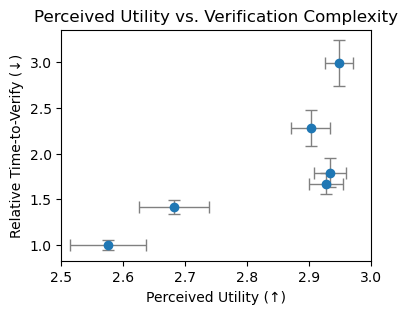

In [18]:
t2vs = []
op_t2vs = get_relative_t2v_by_op(all_results_df, ops, 'Quoted')
avg_relative_t2v = op_t2vs[0][:-2]
se_relative_t2v = op_t2vs[1][:-2]
baseline_t2vs = get_relative_t2v_by_op(all_results_df, ops, 'Quoted Reeval')
avg_relative_t2v.extend(baseline_t2vs[0][-2:])
se_relative_t2v.extend(baseline_t2vs[1][-2:])

avg_utility, se_utility = get_avg_fluency_or_utility_by_op(all_results_df, 'human_utility_rating', ops)

fig, ax1 = plt.subplots()
fig.set_size_inches([4,3])
plt.errorbar(
    avg_utility[1:],                 # x values (Perceived Utility)
    avg_relative_t2v[1:],            # y values (Relative T2V)
    xerr=se_utility[1:],             # x error bars (half of 95% CI for Perceived Utility)
    yerr=se_relative_t2v[1:],        # y error bars (half of 95% CI for Relative T2V)
    fmt='o',                     # Scatter plot marker
    ecolor='gray',               # Error bar color
    capsize=4,                   # Error bar cap size
    capthick=1,                  # Error bar cap thickness
    elinewidth=1                 # Error bar line width
)
# Label axes
plt.xlabel("Perceived Utility (↑)")
plt.ylabel("Relative Time-to-Verify (↓)")
plt.title("Perceived Utility vs. Verification Complexity")

plt.xlim(2.5,3)

plt.savefig('figures/utility_t2v_pareto', bbox_inches='tight', dpi=400)
plt.show()

/Users/theodoraworledge/miniconda3/envs/attrib/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/theodoraworledge/miniconda3/envs/attrib/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/theodoraworledge/miniconda3/envs/attrib/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/theodoraworledge/miniconda3/envs/attrib/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/theodoraworledge/miniconda3/envs/attrib/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype

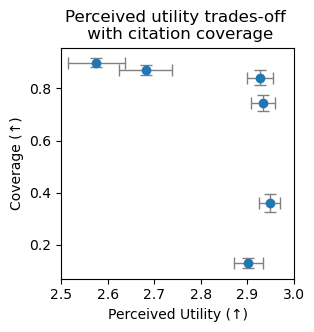

In [19]:
avg_relative_t2v, se_relative_t2v = get_avg_coverage_by_op(all_results_df, ops)
avg_utility, se_utility = get_avg_fluency_or_utility_by_op(all_results_df, 'human_utility_rating', ops)

fig, ax1 = plt.subplots()
fig.set_size_inches([3,3])
plt.errorbar(
    avg_utility[1:],                 # x values (Perceived Utility)
    avg_relative_t2v[2:],            # y values (Relative T2V)
    xerr=se_utility[1:],             # x error bars (half of 95% CI for Perceived Utility)
    yerr=se_relative_t2v[2:],        # y error bars (half of 95% CI for Relative T2V)
    fmt='o',                     # Scatter plot marker
    ecolor='gray',               # Error bar color
    capsize=4,                   # Error bar cap size
    capthick=1,                  # Error bar cap thickness
    elinewidth=1                 # Error bar line width
)

# Label axes
plt.xlabel("Perceived Utility (↑)")
plt.ylabel("Coverage (↑)")
plt.title("Perceived utility trades-off \n with citation coverage")

plt.xlim(2.5,3)
plt.show()

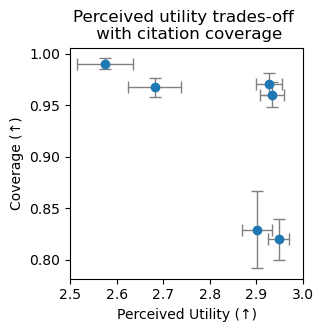

In [20]:
avg_relative_t2v, se_relative_t2v = get_avg_precision_by_op(all_results_df, ops)
avg_utility, se_utility = get_avg_fluency_or_utility_by_op(all_results_df, 'human_utility_rating', ops)

fig, ax1 = plt.subplots()
fig.set_size_inches([3,3])
plt.errorbar(
    avg_utility[1:],                 # x values (Perceived Utility)
    avg_relative_t2v[2:],            # y values (Relative T2V)
    xerr=se_utility[1:],             # x error bars (half of 95% CI for Perceived Utility)
    yerr=se_relative_t2v[2:],        # y error bars (half of 95% CI for Relative T2V)
    fmt='o',                     # Scatter plot marker
    ecolor='gray',               # Error bar color
    capsize=4,                   # Error bar cap size
    capthick=1,                  # Error bar cap thickness
    elinewidth=1                 # Error bar line width
)

# Label axes
plt.xlabel("Perceived Utility (↑)")
plt.ylabel("Coverage (↑)")
plt.title("Perceived utility trades-off \n with citation coverage")

# Optionally, set axis limits to ensure visibility of error bars and data
plt.xlim(2.5,3)
# Display the plot
plt.show()